In [1]:
from os import chdir
chdir('/Users/lananhnguyen/Desktop/thesis/thesis_code')
from packages.load import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, classification_report, log_loss, make_scorer)
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA



# 2. HICP

In [2]:
HICP_monthly = pd.read_excel('data/HICP_COICOP10s.xlsx', sheet_name='HICP_Monthly')
HICP_monthly.head()

,mdates,Rice,Rice.preparations,Flour,Semolina..rye.flour.or.the.like,White.bread,Rye.bread.or.brown.bread,Granary.bread.or.wholemeal.bread,Ready.to.bake.rolls,Fresh.bread.rolls,...,Premium.for.personal.liability.insurance,Premium.for.legal.protection.insurance,Bank.charges,Charge.for.tax.consultant.services,Charge.for.birth.certificate..death.certificate.or.the.like,Passport.fee.or.the.like,Fee.for.lawyer.s.or.notary.s.services,Charge.for.funeral.services.or.cemetery.fee,Classified.advertisement.in.a.newspaper,Visitor.s.tax
0,1996-01-31,86.699997,NaN,74.199997,83.900002,72.000000,72.000000,67.900002,NaN,62.200001,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.500000,64.099998,NaN
1,1996-02-29,86.699997,NaN,73.800003,83.900002,72.199997,72.099998,68.099998,NaN,62.299999,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.500000,64.099998,NaN
2,1996-03-31,86.699997,NaN,73.800003,83.900002,72.300003,72.300003,68.199997,NaN,62.400002,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.500000,64.099998,NaN
3,1996-04-30,86.699997,NaN,73.800003,83.900002,72.300003,72.300003,68.400002,NaN,62.400002,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.599998,64.099998,NaN
4,1996-05-31,86.699997,NaN,73.599998,83.900002,72.500000,72.300003,68.500000,NaN,62.400002,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.599998,64.199997,NaN


In [3]:
HICP_Weights = pd.read_excel('data/HICP_COICOP10s.xlsx', sheet_name='HICP_Weights')
HICP_Weights.head()

,mdates,Rice,Rice.preparations,Flour,Semolina..rye.flour.or.the.like,White.bread,Rye.bread.or.brown.bread,Granary.bread.or.wholemeal.bread,Ready.to.bake.rolls,Fresh.bread.rolls,...,Premium.for.personal.liability.insurance,Premium.for.legal.protection.insurance,Bank.charges,Charge.for.tax.consultant.services,Charge.for.birth.certificate..death.certificate.or.the.like,Passport.fee.or.the.like,Fee.for.lawyer.s.or.notary.s.services,Charge.for.funeral.services.or.cemetery.fee,Classified.advertisement.in.a.newspaper,Visitor.s.tax
0,1996-01-31,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN
1,1996-02-29,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN
2,1996-03-31,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN
3,1996-04-30,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN
4,1996-05-31,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN


In [4]:
HICP_class = pd.read_excel('data/HICP_COICOP10s.xlsx', sheet_name='COICOP_class')
HICP_class.index = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
HICP_class.head()

,Rice,Rice.preparations,Flour,Semolina..rye.flour.or.the.like,White.bread,Rye.bread.or.brown.bread,Granary.bread.or.wholemeal.bread,Ready.to.bake.rolls,Fresh.bread.rolls,Yeast.pastry,...,Premium.for.personal.liability.insurance,Premium.for.legal.protection.insurance,Bank.charges,Charge.for.tax.consultant.services,Charge.for.birth.certificate..death.certificate.or.the.like,Passport.fee.or.the.like,Fee.for.lawyer.s.or.notary.s.services,Charge.for.funeral.services.or.cemetery.fee,Classified.advertisement.in.a.newspaper,Visitor.s.tax
Group 1,Food,Food,Food,Food,Food,Food,Food,Food,Food,Food,...,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food
Group 2,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,...,Services,Services,Services,Services,Services,Services,Services,Services,Services,Services
Group 3,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,...,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services
Group 4,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,...,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services


In [5]:
HICP_monthly.isna().sum()

mdates                                           0
Rice                                             0
Rice.preparations                              228
Flour                                            0
Semolina..rye.flour.or.the.like                  0
                                              ... 
Passport.fee.or.the.like                         0
Fee.for.lawyer.s.or.notary.s.services            0
Charge.for.funeral.services.or.cemetery.fee      0
Classified.advertisement.in.a.newspaper          0
Visitor.s.tax                                  228
Length: 645, dtype: int64

Here is my approach for forecasting headline inflation:

First approach: 
1. Remove all columns that have missing values

2. Calculate year-on-year growth rate HICP_COICOP10 by:

a. Calculate the year-on-year growth rate for each month by subtracting the CPI index of the corresponding month in the previous year from the CPI index of the current year. Then divide the result by the CPI index of the previous year.

b. Express the year-on-year growth rate as a percentage by multiplying it by 100. 

In [18]:
# main predictors:

HICP_yoy = pd.DataFrame()
HICP_yoy = (HICP_monthly.iloc[:, 1:].pct_change(periods=12) * 100) #year-on-year percentage change
HICP_yoy['date'] = HICP_monthly['mdates']
HICP_yoy = HICP_yoy.set_index('date')
HICP_yoy.dropna(axis= 0, how= 'all', inplace=True)


In [66]:
# standardise and plot:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

hicp_std = pd.DataFrame(scaler.fit_transform(HICP_yoy), columns=HICP_yoy.columns)
hicp_std.index = HICP_yoy.index
hicp_std.head()

,Rice,Rice.preparations,Flour,Semolina..rye.flour.or.the.like,White.bread,Rye.bread.or.brown.bread,Granary.bread.or.wholemeal.bread,Ready.to.bake.rolls,Fresh.bread.rolls,Yeast.pastry,...,Premium.for.personal.liability.insurance,Premium.for.legal.protection.insurance,Bank.charges,Charge.for.tax.consultant.services,Charge.for.birth.certificate..death.certificate.or.the.like,Passport.fee.or.the.like,Fee.for.lawyer.s.or.notary.s.services,Charge.for.funeral.services.or.cemetery.fee,Classified.advertisement.in.a.newspaper,Visitor.s.tax
date,,,,,,,,,,,,,,,,,,,,,
1997-01-31,-0.638035,NaN,-0.293674,-0.343679,-0.117648,-0.161801,-0.140162,NaN,-0.226393,-0.286718,...,2.335241,-0.623471,-0.146964,NaN,NaN,2.28242,0.442741,0.727794,-0.815330,NaN
1997-02-28,-0.586464,NaN,-0.231896,-0.324277,-0.064846,-0.061601,-0.246238,NaN,-0.273793,-0.431020,...,2.335241,-0.623471,-0.146964,NaN,NaN,2.28242,0.442741,0.727794,-0.815330,NaN
1997-03-31,-0.612251,NaN,-0.221572,-0.343679,-0.120615,-0.164536,-0.247152,NaN,-0.321042,-0.432294,...,2.335241,-0.623471,-0.164038,NaN,NaN,2.28242,0.442741,0.727794,-0.666471,NaN
1997-04-30,-0.560680,NaN,-0.221572,-0.343679,-0.065911,-0.114119,-0.300716,NaN,-0.274687,-0.432294,...,2.335241,-0.623471,-0.164038,NaN,NaN,2.28242,0.442741,0.724069,-0.368743,NaN
1997-05-31,-0.612251,NaN,-0.211107,-0.343679,-0.122573,-0.114119,-0.301547,NaN,-0.228331,-0.503969,...,2.059797,-0.623471,-0.232335,NaN,NaN,2.28242,0.442741,0.724069,-0.074504,NaN


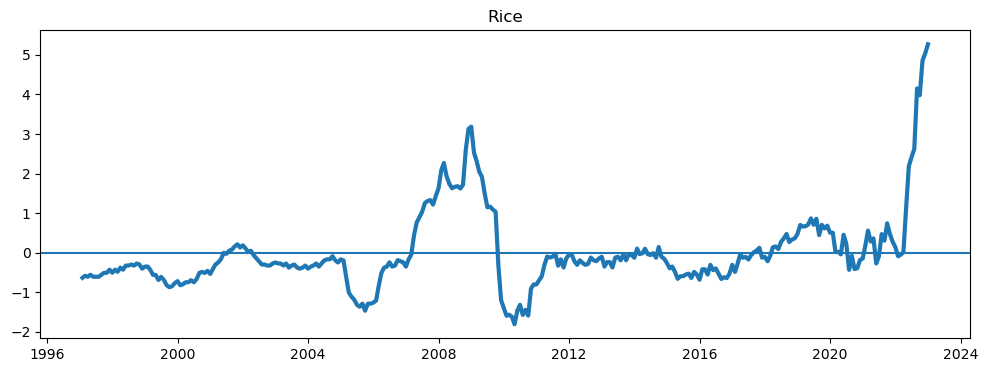

In [74]:
data_viz(hicp_std.iloc[:, 0], title=hicp_std.columns[0], add_line=True)


nan

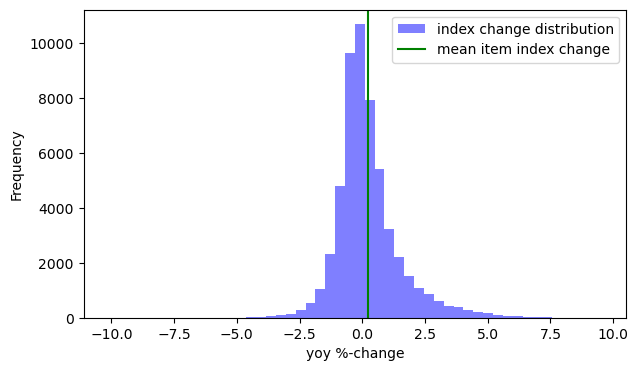

In [89]:
# visualize the distribution of all data:
# need to import the CPI change here!!!

values = hicp_std.dropna().values.flatten()

# Plot the histogram
plt.figure(figsize=(7, 4))
plt.hist(values, bins=50, color='blue', alpha=0.5, label = 'index change distribution')
plt.axvline(values.mean(), color = 'green', label = 'mean item index change')
plt.xlabel('yoy %-change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [90]:
print(f'Shape of dataframe: {HICP_yoy.shape[0]} rows, {HICP_yoy.shape[1]} columns, from {HICP_yoy.index.min()} to {HICP_yoy.index.max()}')

columns_without_missing_values = HICP_yoy.columns[HICP_yoy.isna().sum() == 0]
print(f'Number of columns without missing values: {len(columns_without_missing_values)}')



Shape of dataframe: 312 rows, 644 columns, from 1997-01-31 00:00:00 to 2022-12-31 00:00:00
Number of columns without missing values: 491




3. Categorize all disagregated index into 4 ones: Food, Service, Energy and the rest.
4. Training set: Use the HICP items to forecast grouped CPI, compare to observations and fine-tune hyperparameter.
5. Test set: Use HICP items to forecast the grouped CPI, then aggregate to head and core CPI, compare directly.
 
Second approach: 
Same but with rolling window to gradually introduce new variables.

In [38]:
# Extract data into groups:
# Without missing values:

food_f = HICP_yoy.dropna(axis=1).loc[:, (HICP_class.iloc[0, :] == 'Food')]
services_f = HICP_yoy.dropna(axis=1).loc[:, HICP_class.iloc[1, :] == 'Services']
energy_f = HICP_yoy.dropna(axis=1).loc[:, HICP_class.iloc[1, :] == 'Energy']
negi_f = HICP_yoy.dropna(axis=1).loc[:, HICP_class.iloc[1, :] == 'Non-energy industrial goods (NEIG)']

print('Number of items in food group: ', food_f.shape[1])
print('Number of items in services group: ', services_f.shape[1])
print('Number of items in energy group: ', energy_f.shape[1])
print('Number of items in Non-energy industrial goods (NEIG) group: ', negi_f.shape[1])
print('Total: ', food_f.shape[1] + services_f.shape[1]+ negi_f.shape[1] + energy_f.shape[1])

Number of items in food group:  147
Number of items in services group:  102
Number of items in energy group:  12
Number of items in Non-energy industrial goods (NEIG) group:  230
Total:  491


In [40]:
# Extract data into groups:
# ALL:

food = HICP_yoy.loc[:, (HICP_class.iloc[0, :] == 'Food')]
services = HICP_yoy.loc[:, HICP_class.iloc[1, :] == 'Services']
energy = HICP_yoy.loc[:, HICP_class.iloc[1, :] == 'Energy']
negi = HICP_yoy.loc[:, HICP_class.iloc[1, :] == 'Non-energy industrial goods (NEIG)']

print('Number of items in food group: ', food.shape[1])
print('Number of items in services group: ', services.shape[1])
print('Number of items in energy group: ', energy.shape[1])
print('Number of items in Non-energy industrial goods (NEIG) group: ', negi.shape[1])
print('Total: ', food.shape[1] + services.shape[1]+ negi.shape[1] + energy.shape[1])

Number of items in food group:  180
Number of items in services group:  148
Number of items in energy group:  14
Number of items in Non-energy industrial goods (NEIG) group:  302
Total:  644
